In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')

In [102]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [103]:
# Print all teacher labels
counts = df[' Label'].value_counts()
print(counts)

 Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64


In [104]:
"""

# Count rows with at least one NaN value
nan_rows_count = (df.isna().any(axis=1)).sum()
print("Number of rows with at least one NaN value:", nan_rows_count)

# Exclude last column because it has strings and the check for inf numbers throws an error
X = df.iloc[:,0:-1]

inf_rows_count = np.isinf(X).values.sum() 
print("Number of rows with at least one inf value:", inf_rows_count)



# Drop rows with at least one NaN or inf value

"""

'\n\n# Count rows with at least one NaN value\nnan_rows_count = (df.isna().any(axis=1)).sum()\nprint("Number of rows with at least one NaN value:", nan_rows_count)\n\n# Exclude last column because it has strings and the check for inf numbers throws an error\nX = df.iloc[:,0:-1]\n\ninf_rows_count = np.isinf(X).values.sum() \nprint("Number of rows with at least one inf value:", inf_rows_count)\n\n\n\n# Drop rows with at least one NaN or inf value\n\n'

In [105]:
# Count rows with at least one NaN value
nan_rows_indices = df.index[df.isna().any(axis=1)].tolist()
nan_rows_count = len(nan_rows_indices)
print("Number of rows with at least one NaN value:", nan_rows_count)

# Exclude last column because it has strings and the check for inf numbers throws an error
X = df.iloc[:, 0:-1]

# Count rows with at least one infinite value
inf_rows_indices = X.index[np.isinf(X).any(axis=1)].tolist()
inf_rows_count = len(inf_rows_indices)
print("Number of rows with at least one inf value:", inf_rows_count)

# Combine indices of rows with NaN or inf values
rows_to_drop = set(nan_rows_indices + inf_rows_indices)

# Drop rows with at least one NaN or inf value
df2 = df.drop(index=rows_to_drop)

Number of rows with at least one NaN value: 1008
Number of rows with at least one inf value: 1297


In [106]:
"""
data = {
    'Column_A': [1, 2, None, 4, 5, None, 7, 8, 9, 10],
    'Column_B': [None, 12, 13, 14, None, 16, 17, 18, None, 20],
    'Column_C': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'Column_D': [31, 32, 33, None, 35, 36, 37, None, 39, 40]
}

# Create a DataFrame using the dictionary
df = pd.DataFrame(data)

"""

"\ndata = {\n    'Column_A': [1, 2, None, 4, 5, None, 7, 8, 9, 10],\n    'Column_B': [None, 12, 13, 14, None, 16, 17, 18, None, 20],\n    'Column_C': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],\n    'Column_D': [31, 32, 33, None, 35, 36, 37, None, 39, 40]\n}\n\n# Create a DataFrame using the dictionary\ndf = pd.DataFrame(data)\n\n"

In [116]:
# Replace all non-benign labels with "malicious"
df2[' Label'] = df2[' Label'].where(df2[' Label'] == 'BENIGN', 'MALICIOUS')

X = df2.iloc[:,0:-1]
y = df2.iloc[:, -1]

In [119]:
scaler = MinMaxScaler()

# transform data
scaled_X = scaler.fit_transform(X)
print(scaled_X)
print(scaled_X.shape)

[[1.22161650e-03 3.19241669e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.94011025e-03 4.00000003e-06 4.90335488e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.34377815e-03 9.13333341e-06 4.41301939e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.86130072e-01 6.91666672e-07 4.90335488e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.09320934e-04 8.73863341e-03 2.45167744e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.09320934e-04 7.91166673e-04 1.47100646e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(691406, 78)


In [ ]:
"""

# Iterate over every column in X
for column_name in X.columns:
    column_values = X[column_name]
    min_value = column_values.min()
    max_value = column_values.max()
    print(f"Column {column_name}: Min = {min_value}, Max = {max_value}")
"""

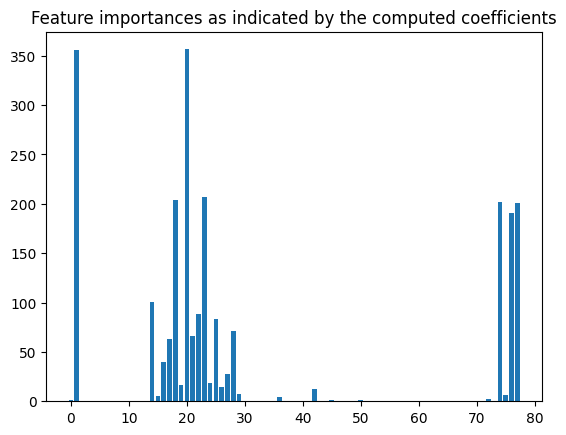

In [122]:
from sklearn.preprocessing import LabelEncoder  

# Convert string labels to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Fit RidgeCV model
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

# Plot feature importances via coefficients
importance = np.abs(ridge.coef_)
# feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
feature_names = [i for i in range(X.shape[1])]
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances as indicated by the computed coefficients")

plt.show()

In [127]:
unique_values, counts = np.unique(y, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")


Value: 0, Count: 439683
Value: 1, Count: 251723


In [ ]:
# Feature importance technique two


In [ ]:
# Data augmentation technique one


In [ ]:
# Data augmentation technique two


In [124]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9995998495820115


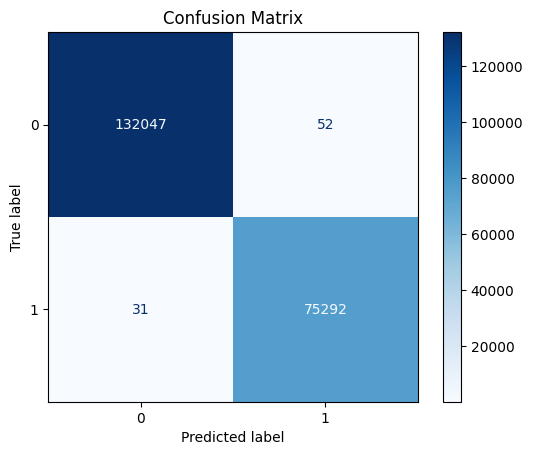

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=clf.classes_)

# Plot the confusion matrix
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

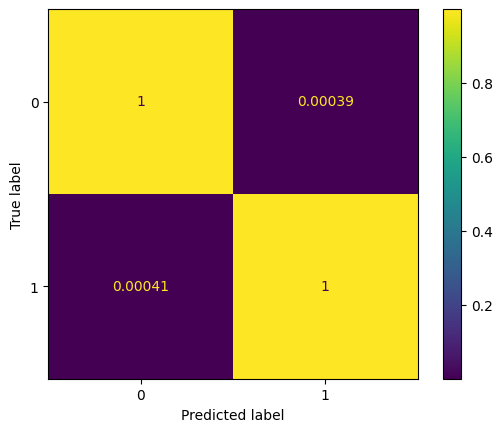

In [144]:
# Use ConfusionMatrixDisplay.from_estimator to create the display directly
disp = ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test, y =y_test, normalize='true')

# Plot the confusion matrix
plt.show()

In [ ]:
# Print number of occurrences for class and make a plot too

In [ ]:
# Plot classes after overbalancing